# Exploratory Data Analysis
### Import libraries and read CSV file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("user_data_ftcr_cleanclip_eda.csv", sep=';') 

In [3]:
df

uid  is_scammer  trx_date  \
0      208cc2b1-7e8c-43d2-ba9f-32269abdf078           0       128   
1      afbeffbd-b905-4323-ac1a-3ba3e07f6951           1       144   
2      24b253b8-84b4-42d4-92b0-7b8537d4f066           1       605   
3      32414559-95f1-48fd-83ff-1ff7cc711d88           1       119   
4      80126b5b-7219-4266-b94b-85620d0b4498           1       121   
...                                     ...         ...       ...   
40712  1ad3cffe-d8a7-40af-9935-1fd1f3272e79           1       107   
40713  5c59f2e5-7935-4589-98fb-1fe2404b2068           1       108   
40714  73d9920f-9f2a-453b-959e-54be6399a011           0       293   
40715  3b3e56d9-525e-4d57-90ab-6c8acaba1dc7           1       153   
40716  dbc2c2ad-e80f-4aa9-a893-c548f0edc7de           0       861   

       report_date  registereddate  birthday  is_verified  \
0              125             856     35000            1   
1              136            1375     34125            1   
2              600             767     33944            1   
3              119             157     33701            1   
4              121             279     32848            1   
...            ...             ...       ...          ...   
40712          107             614     35000            0   
40713          108             126     35000            0   
40714          277            1587     35000            0   
40715          144             706     35000            0   
40716          861            1345     35000            0   

       aqc_freq_prepaid_mobile  aqc_mean_prepaid_mobile_amount  \
0                           25                    1.740000e+16   
1                           33                    7.340000e+15   
2                           27                    6.030000e+15   
3                            0                    0.000000e+00   
4                            0                    0.000000e+00   
...                        ...                             ...   
40712                       34                    1.280000e+16   
40713                        0                    0.000000e+00   
40714                        0                    0.000000e+00   
40715                        0                    0.000000e+00   
40716                        0                    0.000000e+00   

       aqc_freq_topup  ...  gender_Male  gender_None  job_position_KARYAWAN  \
0                 173  ...            1            0                      0   
1                 384  ...            0            0                      0   
2                  68  ...            0            0                      1   
3                  13  ...            1            0                      1   
4                  65  ...            1            0                      1   
...               ...  ...          ...          ...                    ...   
40712             122  ...            0            1                      0   
40713               4  ...            0            1                      0   
40714               3  ...            0            1                      0   
40715              22  ...            0            1                      0   
40716               2  ...            0            1                      0   

       job_position_LAINNYA  job_position_PEGAWAI_NS  job_position_PELAJAR  \
0                         0                        0                     0   
1                         0                        0                     0   
2                         0                        0                     0   
3                         0                        0                     0   
4                         0                        0                     0   
...                     ...                      ...                   ...   
40712                     1                        0                     0   
40713                     1                        0                     0   
40714                     1       

### Correlation Map

In [4]:
# Check Correlation of Features, then Make Relational Map
corr_column = df.select_dtypes(include=[np.number]).columns.to_list()

fig = plt.figure(figsize=(60,40))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Features')

mask = np.triu(np.ones_like(
    df[corr_column].corr(), dtype=np.bool_))

sns.heatmap(df[corr_column].corr(),
            vmin=-1, vmax=1, cmap='vlag', annot=True, fmt='.3f', mask=mask,
            annot_kws = {'fontsize': 10, 'fontweight':'roman'},
            square=True)

plt.show()

### Check Features with Large Correlation to is_scammer

#### registereddate

[Text(0.5, 1.0, 'Registereddate Histogram')]

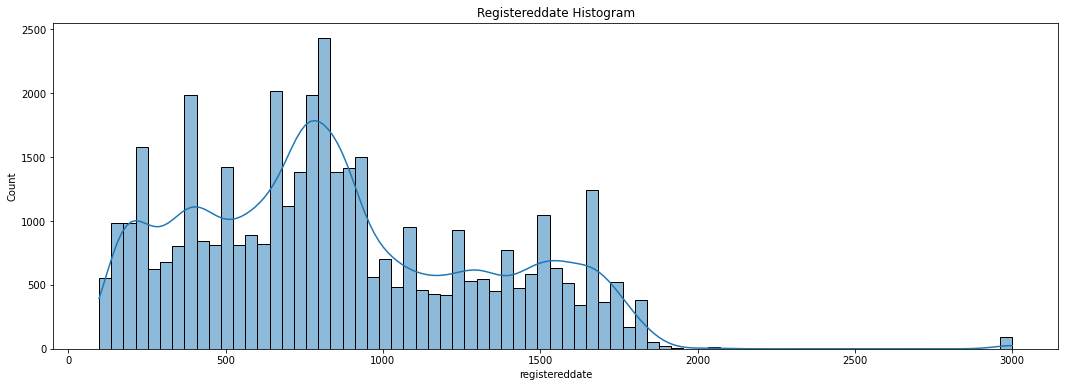

In [5]:
fig, axes = plt.subplots(1, 1, figsize=(18, 6))
sns.histplot(ax=axes, data=df['registereddate'], kde=True).set(title='Registereddate Histogram')

The 'registereddate' data presents the time from current date to each account's registered date in days, distributed into 63 distinct values. User's registereddate data are evenly distributed, with a few outliers given the value of 3000. This group of data are accounts that have null value in their registereddate feature.

Text(0.5, 1.0, 'Scammer Distribution based on Registereddate')

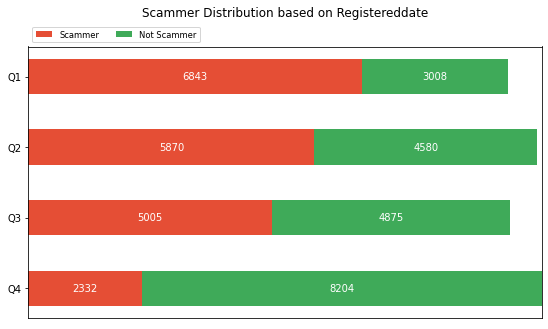

In [9]:
df_reg_1 = df.loc[((df['registereddate'] < df['registereddate'].quantile(0.25)))]['is_scammer'].value_counts()
df_reg_2 = df.loc[((df['registereddate'] >= df['registereddate'].quantile(0.25)) & (df['registereddate'] < df['registereddate'].quantile(0.5)))]['is_scammer'].value_counts()
df_reg_3 = df.loc[((df['registereddate'] >= df['registereddate'].quantile(0.5)) & (df['registereddate'] < df['registereddate'].quantile(0.75)))]['is_scammer'].value_counts()
df_reg_4 = df.loc[((df['registereddate'] >= df['registereddate'].quantile(0.75)))]['is_scammer'].value_counts()

results = {
    'Q1' : [df_reg_1[1], df_reg_1[0]],
    'Q2' : [df_reg_2[1], df_reg_2[0]],
    'Q3' : [df_reg_3[1], df_reg_3[0]],
    'Q4' : [df_reg_4[1], df_reg_4[0]]
}

cat_names = ['Scammer', 'Not Scammer']

labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
cat_col = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(cat_names, cat_col)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
    xcenters = starts + widths / 2
    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax.text(x, y, str(int(c)), ha='center', va='center', color=text_color)
ax.legend(ncol=len(cat_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
plt.title("Scammer Distribution based on Registereddate", pad=30)

Accounts made earlier are less likely to be a scammer than newer accounts. Only 21.5% of the 25% earliest made accounts are scammer compared to 69.0% of the 25% newest made accounts. On a side note, the scammer-nonscammer distribution of total dataset is 50-50.

[Text(0.5, 1.0, 'Not Scammer')]

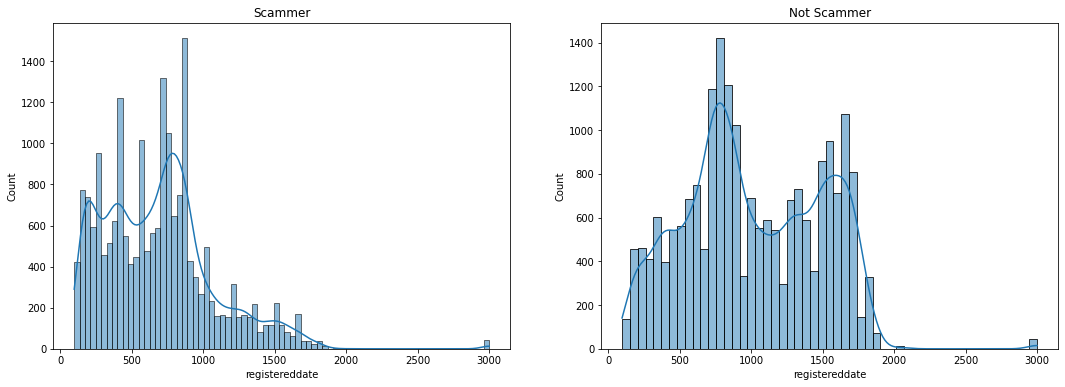

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(ax=axes[0], data=df['registereddate'][df['is_scammer'] == 1], kde=True).set(title='Scammer')
sns.histplot(ax=axes[1], data=df['registereddate'][df['is_scammer'] == 0], kde=True).set(title='Not Scammer')

#### birthday

[Text(0.5, 1.0, 'Birthday Histogram')]

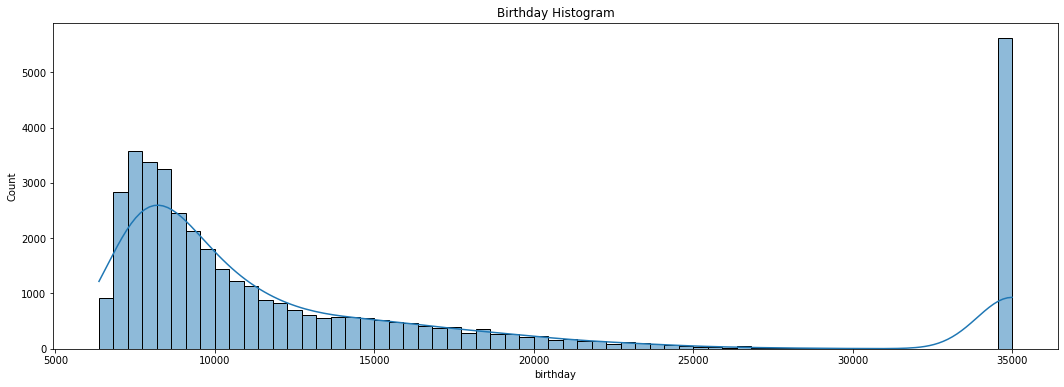

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(18, 6))
sns.histplot(ax=axes, data=df['birthday'], kde=True).set(title='Birthday Histogram')

The birthday feature presents each user's age in days, calculated from today (07/06/2023). We can see there are outliers which birthday equals 35000 or is 120 years old. This group data data are individuals which birthday data is non-existent (N/A). We will see the scammer distribution for that group of data.

In [14]:
df.loc[((df['birthday'] > 32500))]['is_scammer'].value_counts()

1    4541
0    1080
Name: is_scammer, dtype: int64

Surprise, more than 80.8% of users with unregistered birthday are scammers.

Text(0.5, 1.0, 'Scammer Distribution based on Birthday')

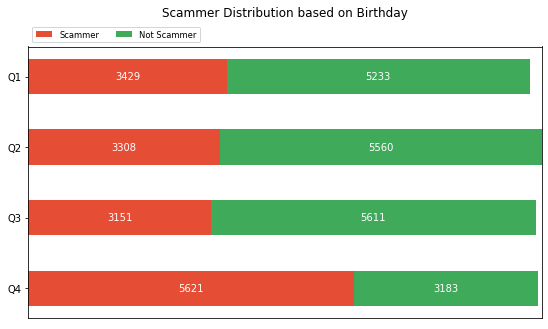

In [15]:
df2 = df.loc[((df['birthday'] <= 32500))]

df_birth_1 = df2.loc[((df2['birthday'] < df2['birthday'].quantile(0.25)))]['is_scammer'].value_counts()
df_birth_2 = df2.loc[((df2['birthday'] >= df2['birthday'].quantile(0.25)) & (df2['birthday'] < df2['birthday'].quantile(0.5)))]['is_scammer'].value_counts()
df_birth_3 = df2.loc[((df2['birthday'] >= df2['birthday'].quantile(0.5)) & (df2['birthday'] < df2['birthday'].quantile(0.75)))]['is_scammer'].value_counts()
df_birth_4 = df2.loc[((df2['birthday'] >= df2['birthday'].quantile(0.75)))]['is_scammer'].value_counts()

results = {
    'Q1' : [df_birth_1[1], df_birth_1[0]],
    'Q2' : [df_birth_2[1], df_birth_2[0]],
    'Q3' : [df_birth_3[1], df_birth_3[0]],
    'Q4' : [df_birth_4[1], df_birth_4[0]]
}

cat_names = ['Scammer', 'Not Scammer']

labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
cat_col = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(cat_names, cat_col)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
    xcenters = starts + widths / 2
    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax.text(x, y, str(int(c)), ha='center', va='center', color=text_color)
ax.legend(ncol=len(cat_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
plt.title("Scammer Distribution based on Birthday", pad=30)

The above figure shows that accounts with earlier birthdays are more likely to be scammer, as is shown on the first quartile's scammer distribution. The ratio of scammers to non scammers for Q2-Q4 are more or less the same, with a slight upward trend.

#### Job Position

Text(0.5, 1.0, 'Scammer Distribution based on Job Position')

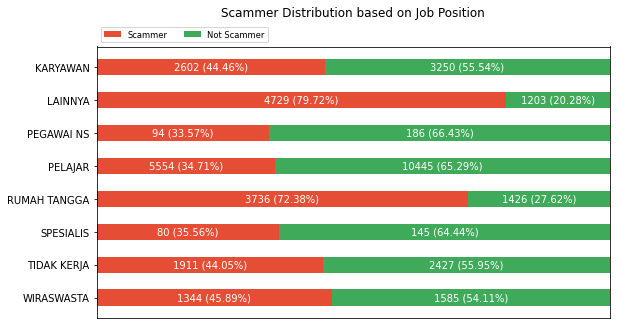

In [16]:
results_perc = {}
results = {}
i = 1

for job in df.columns[-8:]:
    results_perc[" ".join(job.split("_")[2:])] = [
        df.loc[((df[job] == 1))]['is_scammer'].value_counts()[1], 
        df.loc[((df[job] == 1))]['is_scammer'].value_counts()[0]
    ]
    i += 1

for job in df.columns[-8:]:
    scammer_perc = float(df.loc[((df[job] == 1))]['is_scammer'].value_counts()[1])*100/(df.loc[((df[job] == 1))]['is_scammer'].count())
    results[" ".join(job.split("_")[2:])] = [
        scammer_perc, 
        100 - scammer_perc
    ]
    i += 1

cat_names = ['Scammer', 'Not Scammer']

labels = list(results.keys())
data = np.array(list(results.values()))
data_2 = np.array(list(results_perc.values()))
data_cum = data.cumsum(axis=1)
cat_col = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(cat_names, cat_col)):
    widths = data[:, i]
    widths_2 = data_2[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
    xcenters = starts + widths / 2
    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
#     print("colname: ", colname)
    for y, (x, c) in enumerate(zip(xcenters, widths_2)):
        total = data_2[y][0] + data_2[y][1]
        percentage = c*100/total
#         print("y: ", y)
#         print("x: ", x)
#         print(" ")
        ax.text(x, y, str(int(c))+f" ({percentage:.2f}%)", ha='center', va='center', color=text_color)
ax.legend(ncol=len(cat_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
plt.title("Scammer Distribution based on Job Position", pad=30)

Based on the data above, it can be seen that the number of scammers in jobs labeled “Lainnya” and “RT” are the jobs with the highest percentage of scammers, which is more than 60% of the total number of users with those job statuses. However, when looking at the number of users based on their jobs, “Pelajar” is the job with the highest number of scammers, which is 5554 users. The distribution of scammers in each job exceeds 30% of the total number of scammers in each job.

#### Report Date

In [ ]:
# fig2, axes2 = plt.subplots(1, 1, figsize=(18, 6))
# sns.histplot(ax=axes2, data=df['report_date'], kde=True).set(title='Report Date Histogram')

# Note that the distribution of data above is almost even from beginning to end. A reporting spike occurred around the 0.6-0.8 range of the report date.

# df_report_1 = df.loc[((df['report_date'] < df['report_date'].quantile(0.25)))]['is_scammer'].value_counts()
# df_report_2 = df.loc[((df['report_date'] >= df['report_date'].quantile(0.25)) & (df['report_date'] < df['report_date'].quantile(0.5)))]['is_scammer'].value_counts()
# df_report_3 = df.loc[((df['report_date'] >= df['report_date'].quantile(0.5)) & (df['report_date'] < df['report_date'].quantile(0.75)))]['is_scammer'].value_counts()
# df_report_4 = df.loc[((df['report_date'] >= df['report_date'].quantile(0.75)))]['is_scammer'].value_counts()

# results = {
#     'Q1' : [df_report_1[1], df_report_1[0]],
#     'Q2' : [df_report_2[1], df_report_2[0]],
#     'Q3' : [df_report_3[1], df_report_3[0]],
#     'Q4' : [df_report_4[1], df_report_4[0]]
# }

# total_1 = df_report_1[1] + df_report_1[0]
# total_2 = df_report_2[1] + df_report_2[0]
# total_3 = df_report_3[1] + df_report_3[0]
# total_4 = df_report_4[1] + df_report_4[0]

# results_perc = {
#     'Q1' : [df_report_1[1]*100/total_1, df_report_1[0]*100/total_1],
#     'Q2' : [df_report_2[1]*100/total_2, df_report_2[0]*100/total_2],
#     'Q3' : [df_report_3[1]*100/total_3, df_report_3[0]*100/total_3],
#     'Q4' : [df_report_4[1]*100/total_4, df_report_4[0]*100/total_4]
# }

# cat_names = ['Scammer', 'Not Scammer']

# labels = list(results.keys())
# data = np.array(list(results.values()))
# data_2 = np.array(list(results_perc.values()))
# data_cum = data.cumsum(axis=1)
# cat_col = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))

# fig, ax = plt.subplots(figsize=(9.2, 5))
# ax.invert_yaxis()
# ax.xaxis.set_visible(False)
# ax.set_xlim(0, np.sum(data, axis=1).max())

# for i, (colname, color) in enumerate(zip(cat_names, cat_col)):
#     widths = data[:, i]
#     widths_2 = data_2[:, i]
#     starts = data_cum[:, i] - widths
#     ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
#     xcenters = starts + widths / 2
#     r, g, b, _ = color
#     text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
#     for y, (x, c) in enumerate(zip(xcenters, widths)):
#         ax.text(x, y, str(int(c)), ha='center', va='center', color=text_color)
# ax.legend(ncol=len(cat_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
# plt.title("Scammer Distribution Based on Report Date Per Quantile", pad=30)

#### is_verified

In [17]:
df.loc[(df['is_verified'] == 0)]['is_scammer'].value_counts()

1    4535
0    1079
Name: is_scammer, dtype: int64

More than 80.7% of unverified users are scammers.

#### Check Correlation score between is_scammer with other features

In [18]:
numeric_cols = df.select_dtypes(include=np.number).columns
correlations = {}

for col in numeric_cols:
    if col != 'is_scammer':
        correlation = df['is_scammer'].corr(df[col])
        correlations[col] = correlation

correlation_series = pd.Series(correlations)
correlation_series = abs(correlation_series)
top_10 = correlation_series.nlargest(10)
worst_10 = correlation_series.nsmallest(10)

print("Top 10 correlations:")
print(top_10)
print("\nWorst 10 correlations:")
print(worst_10)

Top 10 correlations:
account_lifetime                  0.422284
registereddate                    0.353660
birthday                          0.319207
age                               0.307839
gender_Male                       0.261102
gender_None                       0.255309
is_verified                       0.252276
job_position_LAINNYA              0.251749
job_position_PELAJAR              0.233784
dormancy_max_gmt_pay_diff_days    0.225679
dtype: float64

Worst 10 correlations:
kyc_total_failed             0.001014
freq_x2x_per_lifetime        0.004190
aqc_total_x2x_amount_7d      0.008055
count_trx_per_lifetime       0.009986
job_position_WIRASWASTA      0.018691
job_position_SPESIALIS       0.020407
aqc_mean_topup_amount        0.024713
job_position_PEGAWAI_NS      0.026083
aqc_mean_topup_amount_90d    0.027524
dormancy_count_trx           0.030120
dtype: float64


#### gender

In [19]:
results_perc = {}
results = {}
i = 1

for gender in df.columns[-11:-8]:
    results_perc[" ".join(gender.split("_")[1:])] = [
        df.loc[((df[gender] == 1))]['is_scammer'].value_counts()[1], 
        df.loc[((df[gender] == 1))]['is_scammer'].value_counts()[0]
    ]
    i += 1

for gender in df.columns[-11:-8]:
    scammer_perc = float(df.loc[((df[gender] == 1))]['is_scammer'].value_counts()[1])*100/(df.loc[((df[gender] == 1))]['is_scammer'].count())
    results[" ".join(gender.split("_")[1:])] = [
        scammer_perc, 
        100 - scammer_perc
    ]
    i += 1

cat_names = ['Scammer', 'Not Scammer']

labels = list(results.keys())
data = np.array(list(results.values()))
data_2 = np.array(list(results_perc.values()))
data_cum = data.cumsum(axis=1)
cat_col = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(8, 2))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

# matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', data=None, **kwargs)[source]
# matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)
for i, (colname, color) in enumerate(zip(cat_names, cat_col)):
    widths = data[:, i]
    widths_2 = data_2[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
    xcenters = starts + widths / 2
    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
#     print("colname: ", colname)
    for y, (x, c) in enumerate(zip(xcenters, widths_2)):
        total = data_2[y][0] + data_2[y][1]
        percentage = c*100/total
#         print("y: ", y)
#         print("x: ", x)
#         print(" ")
        ax.text(x, y, str(int(c))+f" ({percentage:.2f}%)", ha='center', va='center', color=text_color)
ax.legend(ncol=len(cat_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
plt.title("Scammer Distribution based on gender Position", pad=30)

Text(0.5, 1.0, 'Scammer Distribution based on gender Position')

Above result show that over 82% of users that does not specify their gender are scammers. Meanwhile female users are more likely to be a scammer (56.2%) compared to male users (37.5).

In [ ]:
# results_perc = {}
# results = {}

# for gender in df.columns[-11:-8]:
#     results_perc[" ".join(gender.split("_")[1:])] = [
#         df.loc[((df[gender] == 1))]['is_scammer'].value_counts()[1], 
#         df.loc[((df[gender] == 1))]['is_scammer'].value_counts()[0]
#     ]

# for gender in df.columns[-11:-8]:
#     scammer_perc = float(df.loc[((df[gender] == 1))]['is_scammer'].value_counts()[1])*100/(df.loc[((df[gender] == 1))]['is_scammer'].count())
#     results[" ".join(gender.split("_")[1:])] = [
#         scammer_perc, 
#         100 - scammer_perc
#     ]

# # Adding the None category
# results_perc["None"] = [
#     df.loc[df[df.columns[-8:-11]].sum(axis=1) == 0, 'is_scammer'].value_counts()[1], 
#     df.loc[df[df.columns[-8:-11]].sum(axis=1) == 0, 'is_scammer'].value_counts()[0]
# ]
# scammer_perc_none = float(df.loc[df[df.columns[-8:-11]].sum(axis=1) == 0, 'is_scammer'].value_counts()[1]) * 100 / (df.loc[df[df.columns[-8:-11]].sum(axis=1) == 0, 'is_scammer'].count())
# results["None"] = [
#     scammer_perc_none,
#     100 - scammer_perc_none
# ]

# cat_names = ['Scammer', 'Not Scammer']
# labels = list(results.keys())
# data_2 = np.array(list(results_perc.values()))

# # Assigning colors
# colors = ['green', 'red', 'blue']

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
# plt.subplots_adjust(wspace=0.4)

# # Plotting the pie chart for Female
# ax1.pie(labels, labels=cat_names, autopct='%1.1f%%', colors=colors)
# ax1.set_title("Scammer Distribution - Female")

# # Plotting the pie chart for Male
# ax2.pie(labels, labels=cat_names, autopct='%1.1f%%', colors=colors)
# ax2.set_title("Scammer Distribution - Male")

# # Plotting the pie chart for None
# #ax3.pie(data_2[:, 2], labels=labels, autopct='%1.1f%%', colors=colors)
# #ax3.set_title("Scammer Distribution - None")

# plt.show()


[Text(0.5, 1.0, 'Account Lifetime Histogram')]

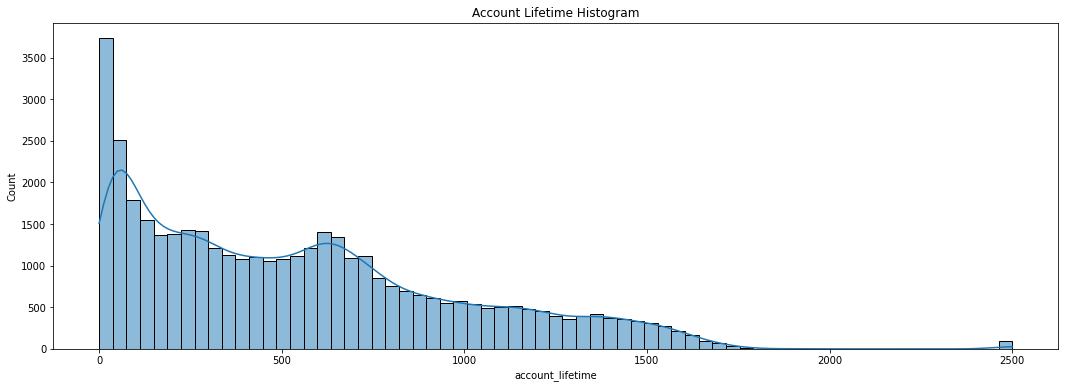

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(18, 6))
sns.histplot(ax=axes, data=df['account_lifetime'], kde=True).set(title='Account Lifetime Histogram')

The 'account_lifetime" feature given information of the number of days from last transfer date in that account, compared to the account's reported date.

In [33]:
df.loc[(df['account_lifetime'] < df['account_lifetime'].quantile(.1))]['is_scammer'].value_counts()[1]

3490

In [81]:
df.loc[((df['account_lifetime'] >= df['account_lifetime'].quantile(0)) & (df['account_lifetime'] < df['account_lifetime'].quantile(.1)))]['is_scammer'].value_counts()[1]

3490

In [82]:
window = 10
acc_lifetime_scammer_rate = {}
for i in range (0,window):
    temp_data = df.loc[((df['account_lifetime'] >= df['account_lifetime'].quantile(.1*i)) & (df['account_lifetime'] < df['account_lifetime'].quantile(.1*(i+1))))]['is_scammer']
    n_scammer = temp_data.value_counts()[1]
    n_tot = len(temp_data)
    acc_lifetime_scammer_rate[i+1] = n_scammer/n_tot

In [83]:
acc_lifetime_scammer_rate

{1: 0.8722819295176206,
 2: 0.7602040816326531,
 3: 0.6800686442755577,
 4: 0.6031003937007874,
 5: 0.5338401177047573,
 6: 0.4307162195422102,
 7: 0.3686782311263132,
 8: 0.2956607011522432,
 9: 0.21057810578105782,
 10: 0.1661654135338346}

In [106]:
acc_lifetime_df = pd.DataFrame.from_dict(acc_lifetime_scammer_rate, orient='index')
acc_lifetime_df = acc_lifetime_df.rename(columns={0: "Scammer Rate"})

f, (ax) = plt.subplots(figsize=(20, 5))
ax = sns.pointplot(data=acc_lifetime_df, x=[1,2,3,4,5,6,7,8,9,10], y='Scammer Rate', linestyles='dotted')

bp = sns.barplot(data=acc_lifetime_df, x=[1,2,3,4,5,6,7,8,9,10], y='Scammer Rate', alpha=0)
labels = bp.bar_label(bp.containers[0])

plt.xlabel("Per 10 Percentile")
plt.title("Scammer Rate based on Partitions of Account Lifetime")

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

The above graph divides the account lifetime feature per user per 10 percent of data. The first 10% data is represented by index 1, and so on. We can see that there is a strong, opposite, and almost linear relationship between scammer rate and user's account lifetime. Accounts with low lifetime score has a higher scammer rate (more than 83%) than accounts with higher lifetime.

In [77]:
acc_lifetime_df

Scammer Rate
1       0.451030
2       0.411994
3       0.373655
4       0.335528
5       0.295844
6       0.262258
7       0.226622
8       0.192043
9       0.173572
10      0.505618

In [108]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.3.4


In [109]:
!pip install matplotlib==3.4.1

ERROR: Could not find a version that satisfies the requirement matplotlib==3.4.1 (from versions: 0.86, 0.86.1, 0.86.2, 0.91.0, 0.91.1, 1.0.1, 1.1.0, 1.1.1, 1.2.0, 1.2.1, 1.3.0, 1.3.1, 1.4.0, 1.4.1rc1, 1.4.1, 1.4.2, 1.4.3, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 2.0.0b1, 2.0.0b2, 2.0.0b3, 2.0.0b4, 2.0.0rc1, 2.0.0rc2, 2.0.0, 2.0.1, 2.0.2, 2.1.0rc1, 2.1.0, 2.1.1, 2.1.2, 2.2.0rc1, 2.2.0, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 3.0.0rc2, 3.0.0, 3.0.1, 3.0.2, 3.0.3, 3.1.0rc1, 3.1.0rc2, 3.1.0, 3.1.1, 3.1.2, 3.1.3, 3.2.0rc1, 3.2.0rc3, 3.2.0, 3.2.1, 3.2.2, 3.3.0rc1, 3.3.0, 3.3.1, 3.3.2, 3.3.3, 3.3.4)
ERROR: No matching distribution found for matplotlib==3.4.1


In [110]:
!conda install -c conda-forge matplotlib==3.4.2

Retrieving notices: ...working... done
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed



Examining @/win-64::__cuda==11.6=0:  80%|########  | 4/5 [00:01<00:00,  3.18it/s]      
                                                                                 

Examining conflict for python matplotlib:   0%|          | 0/5 [00:00<?, ?it/s]
                                                                               

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - matplotlib==3.4.2 -> python[version='>=3.7,<3.8.0a0|>=3.8,<3.9.0a0|>=3.9,<3.10.0a0']

Your python: python=3.6

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.



